In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Read Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
sex_mapping = {"male": 1, "female": 0}
train['Sex'] = train['Sex'].replace(sex_mapping)
test['Sex'] = test['Sex'].replace(sex_mapping)

train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(train['Age'].mean())

X_train = train.drop("Survived", axis=1)
X_train = X_train.drop("Name", axis=1)
X_train = X_train.drop("PassengerId", axis=1)
X_train = X_train.drop("Cabin", axis=1)
X_train = X_train.drop("Embarked", axis=1)
X_train = X_train.drop("Ticket", axis=1)

X_train

C:\Users\Advika\AppData\Local\Temp\ipykernel_25172\1531315371.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace(sex_mapping)
C:\Users\Advika\AppData\Local\Temp\ipykernel_25172\1531315371.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace(sex_mapping)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [78]:
y_train = train.iloc[:,1]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
X_test = test.drop("Name", axis=1)
X_test = X_test.drop("PassengerId", axis=1)
X_test = X_test.drop("Cabin", axis=1)
X_test = X_test.drop("Embarked", axis=1)
X_test = X_test.drop("Ticket", axis=1)

X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.500000,0,0,7.8292
1,3,0,47.000000,1,0,7.0000
2,2,1,62.000000,0,0,9.6875
3,3,1,27.000000,0,0,8.6625
4,3,0,22.000000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500
414,1,0,39.000000,0,0,108.9000
415,3,1,38.500000,0,0,7.2500
416,3,1,29.699118,0,0,8.0500


In [80]:
y = pd.read_csv('gender_submission.csv')
y = y.iloc[:,1]
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [81]:
X_train = X_train.T
X_test = X_test.T

In [82]:
def sigmoid(z):
    epsilon = 1e-5  # A small number to prevent log(0)
    return np.clip((1 / (1 + np.exp(-z))), epsilon, 1 - epsilon)

In [92]:
y_train = np.array(y_train)

epochs = 10000
learning_rate = 0.01
coefficients = np.zeros((1, X_train.shape[0])) 
bias = 0

loss_history = []

for e in range(epochs):
    value = np.dot(coefficients, X_train) + bias
    y_pred = sigmoid(value)
    
    epsilon = 1e-5  # A small number to prevent log(0)
    loss = -np.mean(y_train * np.log(y_pred + epsilon) + (1 - y_train) * np.log(1 - y_pred + epsilon))
    loss_history.append(loss)
    
    coefficients += learning_rate * ((1 / X_train.shape[1]) * np.dot((y_train - y_pred), X_train.T))
    bias += learning_rate * (1 / X_train.shape[1]) * np.sum(y_train - y_pred)
    
    if e % 500 == 0:
        learning_rate = learning_rate / 1.2


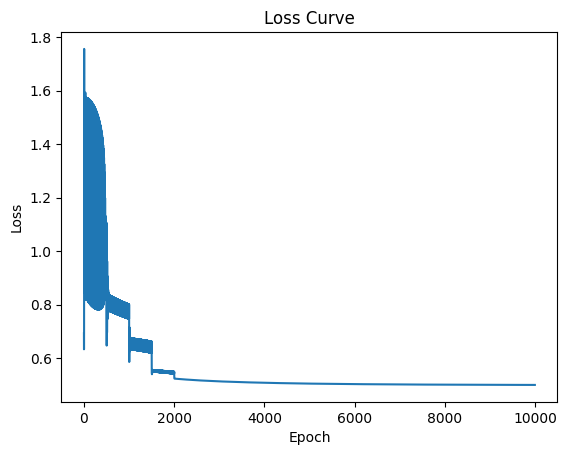

In [93]:
plt.plot(loss_history)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [94]:
# Assuming y is your ground truth labels for the test set
y = np.array(y)  # Convert y_test to a numpy array if it's not already

# probability calculation and prediction
probability = np.dot(coefficients, X_test) + bias  # Probability of Survival
y_pred = sigmoid(probability)
y_pred = y_pred > 0.5  # Boolean form of Prediction
y_pred = y_pred.astype('int64')  # Converting to Integer

# Calculate accuracy
#accuracy = (np.sum(y_pred == y) / y.shape[0]) * 100
accuracy = (1 - np.sum(np.absolute(y_pred - y)) / y.shape[0]) * 100
print("Accuracy of model: ", round(accuracy, 2), '%')


Accuracy of model:  92.11 %
